<a href="https://colab.research.google.com/github/gyukebox/keras-cnn-image-classification/blob/main/shell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip -uq drive/MyDrive/Colab\ Notebooks/images.zip -d data

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

kwargs = {
    'directory': 'data/images',
    'validation_split': 0.2,
    'seed': 1557,
    'batch_size': 64,
    'image_size': (300, 300),
    'label_mode': 'categorical',
}

train_data = image_dataset_from_directory(subset='training', **kwargs)
test_data = image_dataset_from_directory(subset='validation', **kwargs)

Found 45000 files belonging to 3 classes.
Using 36000 files for training.
Found 45000 files belonging to 3 classes.
Using 9000 files for validation.


In [ ]:
print(train_data.class_names, end='\n\n')

for image, label in test_data.take(1):
    print(image.shape)
    print(label.shape, end='\n\n')
    print(image[0].shape)
    print(label[0].shape)

['0_food', '1_interior', '2_exterior']

(64, 300, 300, 3)
(64, 3)

(300, 300, 3)
(3,)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    BatchNormalization, 
    Input, 
    Conv2D, 
    MaxPooling2D, 
    Dense, 
    Dropout, 
    GlobalAveragePooling2D
)

model = Sequential([
    Input(shape=(300, 300, 3), name='input_layer'),

    Conv2D(32, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(64, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(128, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),

    Conv2D(256, kernel_size=3, activation='relu'),
    MaxPooling2D(pool_size=2),

    GlobalAveragePooling2D(),
    Dense(64, activation='relu'),
    Dropout(0.25),
    Dense(3, activation='softmax', name='output_layer')
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 33, 33, 256)      

In [ ]:
import os
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

drive_dir = 'drive/MyDrive/Colab Notebooks/'

mode = {'monitor': 'val_loss', 'mode': 'min', 'verbose': 1}
early_stopping = EarlyStopping(patience=10, **mode)
checkpoint = ModelCheckpoint(
    os.path.join(drive_dir, 'model-201611306'), 
    save_best_only=True, 
    **mode
)

model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy'],
)

history = model.fit(
    train_data, 
    batch_size=64, 
    validation_data=test_data, 
    validation_batch_size=64, 
    epochs=100, 
    verbose=1,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/100
563/563 [==============================] - ETA: 0s - loss: 0.8654 - accuracy: 0.6814
Epoch 00001: val_loss improved from inf to 0.52050, saving model to drive/MyDrive/Colab Notebooks/model-201611306
INFO:tensorflow:Assets written to: drive/MyDrive/Colab Notebooks/model-201611306/assets
563/563 [==============================] - 213s 378ms/step - loss: 0.8654 - accuracy: 0.6814 - val_loss: 0.5205 - val_accuracy: 0.7734
Epoch 2/100
563/563 [==============================] - ETA: 0s - loss: 0.5095 - accuracy: 0.7954
Epoch 00002: val_loss improved from 0.52050 to 0.45825, saving model to drive/MyDrive/Colab Notebooks/model-201611306
INFO:tensorflow:Assets written to: drive/MyDrive/Colab Notebooks/model-201611306/assets
563/563 [==============================] - 186s 330ms/step - loss: 0.5095 - accuracy: 0.7954 - val_loss: 0.4583 - val_accuracy: 0.8206
Epoch 3/100
563/563 [==============================] - ETA: 0s - loss: 0.4507 - accuracy: 0.8205
Epoch 00003: val_loss improved 

In [ ]:
import matplotlib.pyplot as plt


def plot_loss_curve(history):
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()


def plot_accuracy_curve(history):
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()

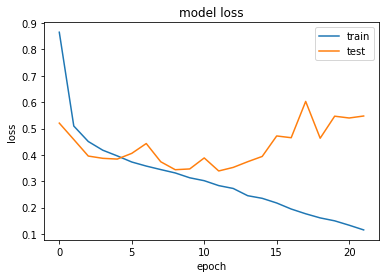

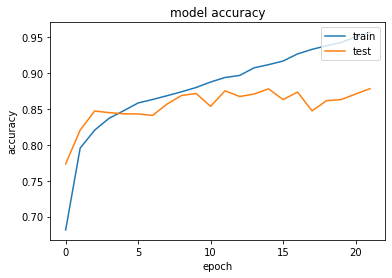

In [ ]:
plot_loss_curve(history.history)
plot_accuracy_curve(history.history)

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('drive/MyDrive/Colab Notebooks/model-201611306')

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 33, 33, 256)      

In [ ]:
import tensorflow as tf

test_y = tf.constant([-1], dtype='int64')
predictions = tf.constant([-1], dtype='int64')

for source, target in test_data:
    batch_predictions = model.predict(source, batch_size=32)
    test_y = tf.concat([test_y, tf.argmax(target, axis=1)], axis=0)
    predictions = tf.concat([predictions, tf.argmax(batch_predictions, axis=1)], axis=0)

print(test_y.shape)
print(predictions.shape)

(9001,)
(9001,)


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

index_2_label = {0: '음식', 1: '실내', 2: '실외'}
answers = [index_2_label[answer] for answer in test_y[1:].numpy()]
preds = [index_2_label[pred] for pred in predictions[1:].numpy()]

print('Test Accuracy: {:.2%}'.format(accuracy_score(answers, preds)))
print('Macro F1: {:.2f}'.format(f1_score(answers, preds, average='macro')))
print('Classification Report: \n{}'.format(classification_report(answers, preds)))

Test Accuracy: 87.53%
Macro F1: 0.86
Classification Report: 
              precision    recall  f1-score   support

          실내       0.84      0.81      0.82      3017
          실외       0.83      0.81      0.82      2048
          음식       0.93      0.96      0.94      3935

    accuracy                           0.88      9000
   macro avg       0.86      0.86      0.86      9000
weighted avg       0.87      0.88      0.87      9000



In [ ]:
import tensorflow as tf

test_data_list = list(test_data.take(1).as_numpy_iterator())
print(len(test_data_list))

source, target = test_data_list[0]
print(tf.constant(source).shape)
print(tf.constant(target).shape)

1
(64, 300, 300, 3)
(64, 3)


In [ ]:
correct_pred = []
incorrect_pred = []

for source, target in test_data_list:
    # batch size
    for i in range(3, 64):
        prediction = tf.argmax(model.predict(tf.expand_dims(source[i], axis=0)), axis=1)[0].numpy()
        answer = tf.argmax(target[i], axis=0).numpy()

        if prediction == answer:
            correct_pred.append((source[i], prediction, answer))
        else:
            incorrect_pred.append((source[i], prediction, answer))

        if len(correct_pred) >= 3 and len(incorrect_pred) >= 3:
            break
    
    if len(correct_pred) >= 3 and len(incorrect_pred) >= 3:
            break

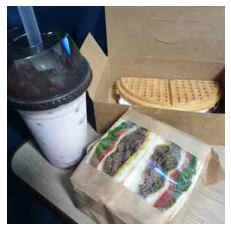

예측한 클래스: 음식, 실제 클래스: 음식


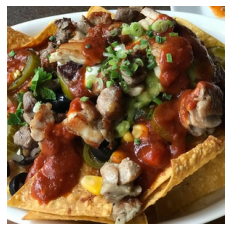

예측한 클래스: 음식, 실제 클래스: 음식


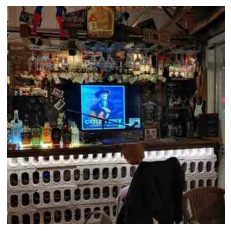

예측한 클래스: 실내, 실제 클래스: 실내


In [ ]:
import matplotlib.pyplot as plt

index_2_label = {0: '음식', 1: '실내', 2: '실외'}
    
for i in range(3):
    img, prediction, answer = correct_pred[i]

    plt.axis('off')
    plt.imshow(img.astype('uint8'))
    plt.show()

    print('예측한 클래스: {}, 실제 클래스: {}'.format(index_2_label[prediction], index_2_label[answer]))

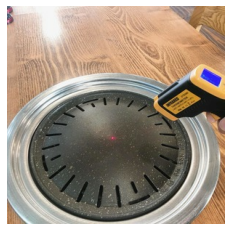

예측한 클래스: 음식, 실제 클래스: 실내


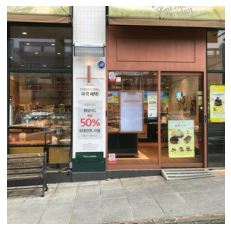

예측한 클래스: 실내, 실제 클래스: 실외


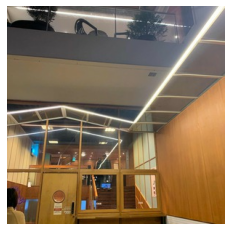

예측한 클래스: 실내, 실제 클래스: 실외


In [ ]:
for i in range(3):
    img, prediction, answer = incorrect_pred[i]

    plt.axis('off')
    plt.imshow(img.astype('uint8'))
    plt.show()

    print('예측한 클래스: {}, 실제 클래스: {}'.format(index_2_label[prediction], index_2_label[answer]))